In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the dataset into the notebook
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# basic overview of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# checking datatypes and possible null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# checking the statistical metrics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# changing Churn column to binary digits 
df['Churn']=np.where(df['Churn']=='No', 0 , 1)

In [8]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

**We can see class imbalance here as there are more values related to 0 or 'No Churn'**

<AxesSubplot:>

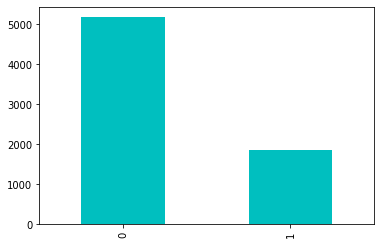

In [9]:
#bar graph representation of churn
df['Churn'].value_counts().plot(kind='bar',color='c')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

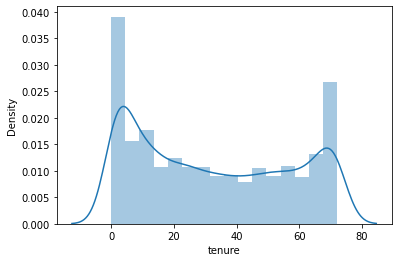

In [10]:
#checking for the distribution of tenures 
sns.distplot(df['tenure'],hist=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

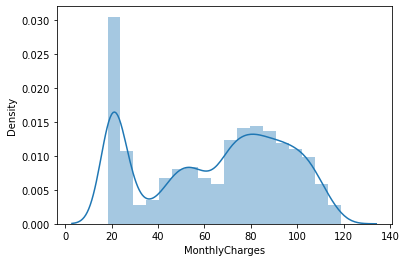

In [11]:
#checking for distribution of monthly charges
sns.distplot(df['MonthlyCharges'],hist=True)

In [12]:
#changing datatype of totalcharges column
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce',downcast='float')

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#dropping all the null values encountered
df.dropna(axis=0,inplace=True)

In [15]:
#separating the categorical columns for analysis
categorical_columns=df.select_dtypes(exclude='number')


In [16]:
# CustormerID has been dropped as it's of no use
categorical_columns.drop('customerID',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


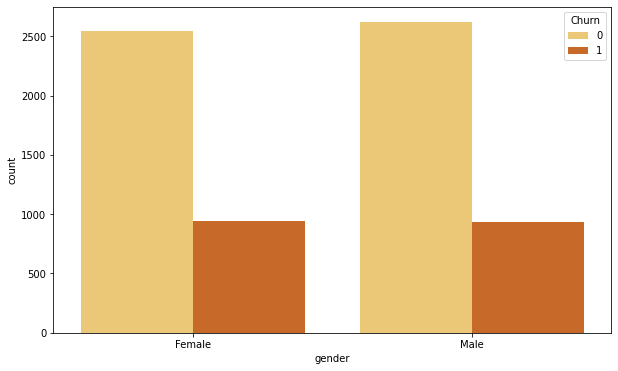

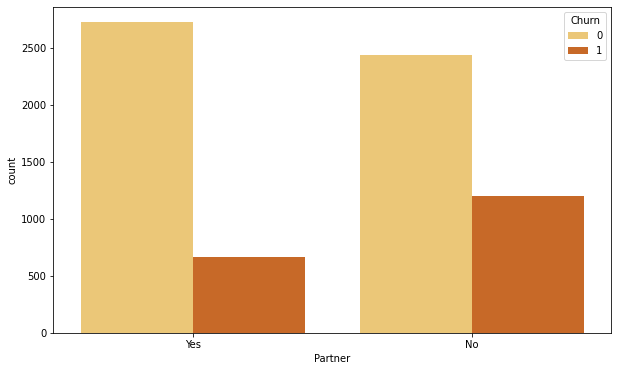

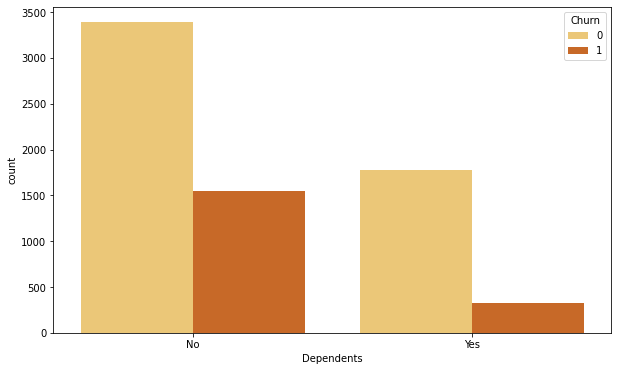

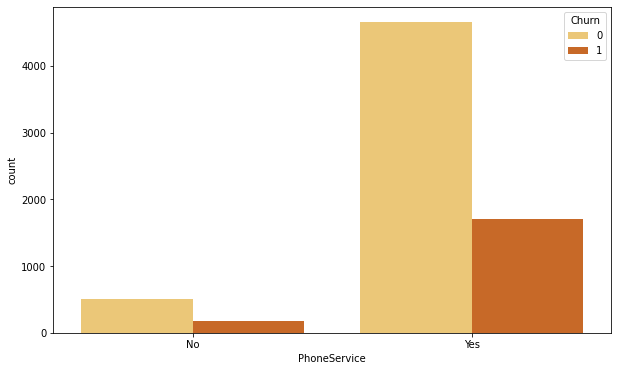

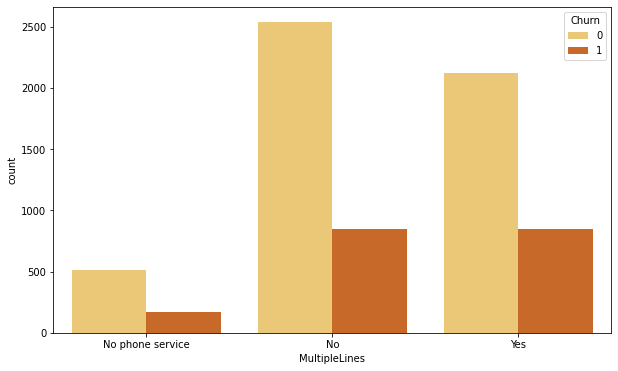

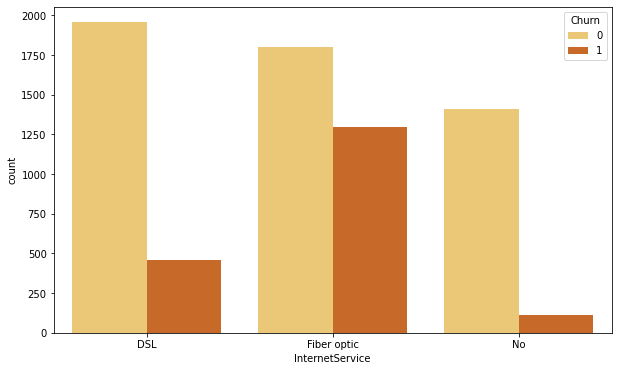

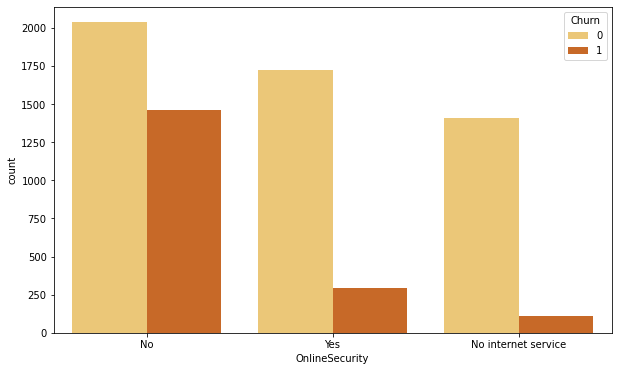

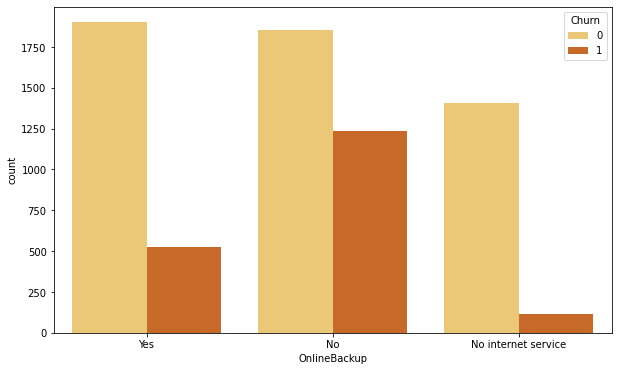

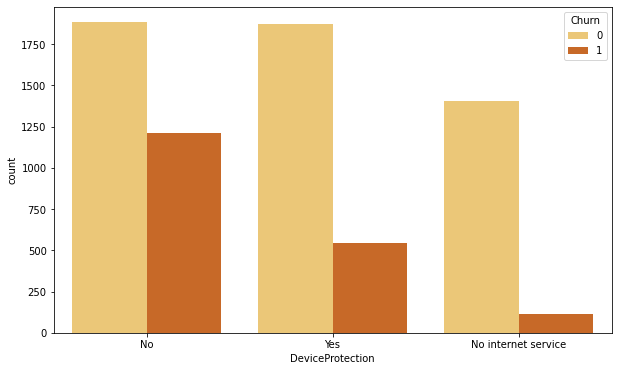

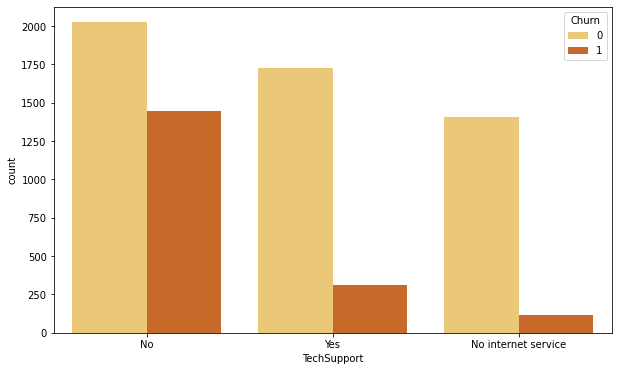

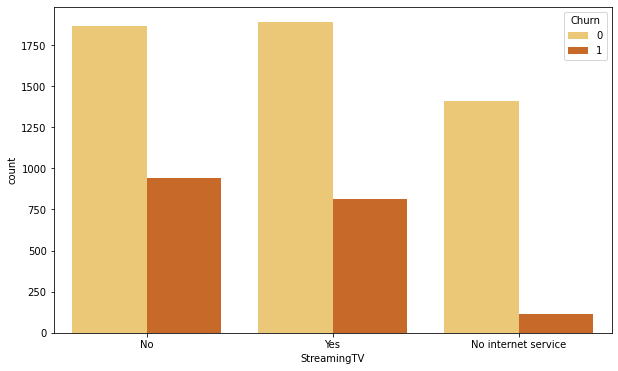

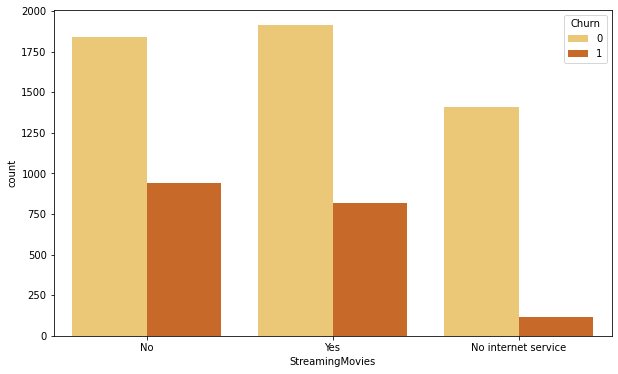

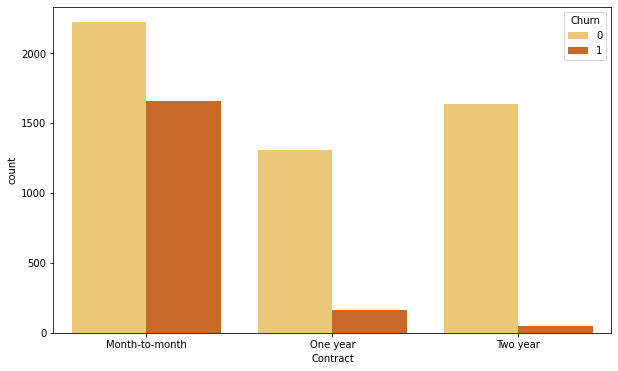

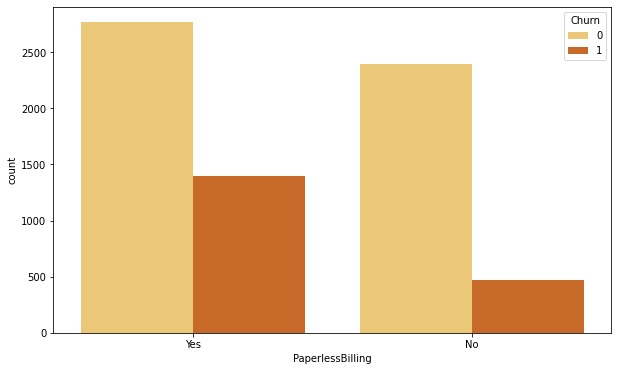

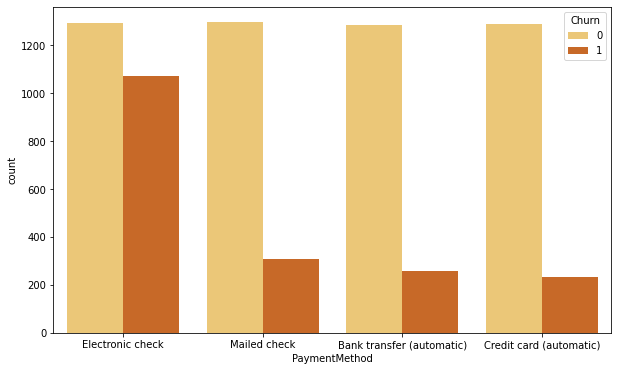

In [65]:
#checking Churn for various categorical features
for i in categorical_columns:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[i],data=df,hue='Churn',palette='YlOrBr')

In [18]:
df.drop('customerID',axis=1,inplace=True)

In [19]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [20]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300537,0.265785
std,24.545260,30.085974,2266.771484,0.441782
min,1.000000,18.250000,18.799999,0.000000
25%,9.000000,35.587500,401.449997,0.000000
50%,29.000000,70.350000,1397.475037,0.000000
75%,55.000000,89.862500,3794.737488,1.000000
max,72.000000,118.750000,8684.799805,1.000000


In [21]:
#checking for outliers
numerical_categories = ['tenure','MonthlyCharges','TotalCharges']

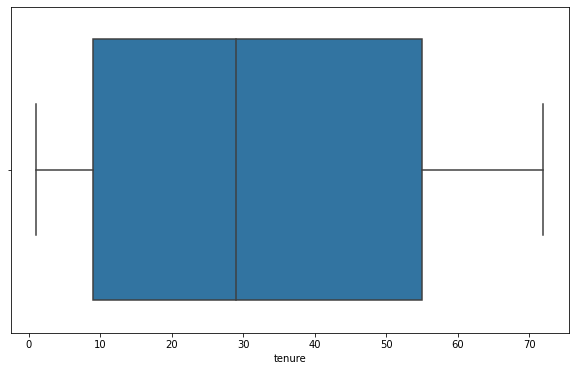

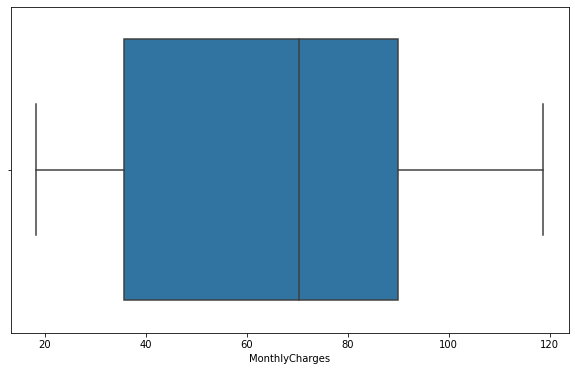

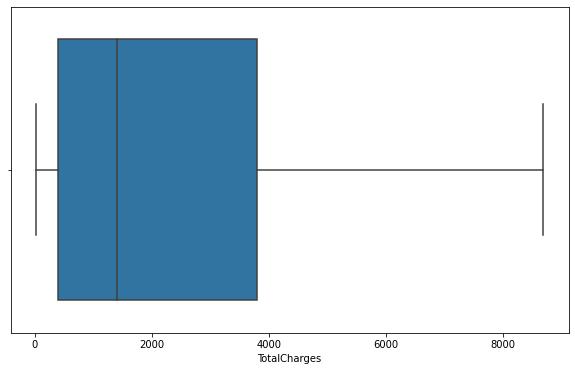

In [22]:
for i in numerical_categories:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[i],hue=df['Churn'],data=df)

**We did not find any outliers as observed through boxplots.**

In [23]:
# using labeling for dealing with Categorical values (Feature Engineering)
data = pd.get_dummies(df,drop_first=True)

In [24]:
# importing the required features to be used from sklearn library
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [25]:
classifier = LogisticRegression()

In [26]:
scaler = MinMaxScaler()


In [27]:
#selecting the dependent variable
y=df['Churn']

In [28]:
# selecting the independent variables
data.drop('Churn',axis=1,inplace=True)

In [29]:
X = data

In [30]:
X

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.850000,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.500000,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.150002,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.750000,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.649994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.500000,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.899902,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.450012,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.600006,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [31]:
# creating the train & test splits
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3,random_state=101)


In [32]:
# scaling the data using MinMaxScaler
scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train_scaled = scaler.transform(X_train)

In [34]:
scaler.fit(X_test)

MinMaxScaler()

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [37]:
predictions = classifier.predict(X_test_scaled)

In [38]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


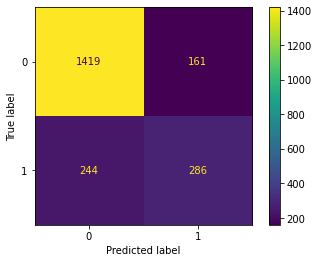

In [39]:
 # using confusion matrix to visualize the predictions 
 plot_confusion_matrix(classifier,X_test_scaled,y_test)


In [40]:
from sklearn.metrics import classification_report

In [41]:
report=classification_report(y_test,predictions)

In [42]:
# checking for precision, recall, F1score & accuracy
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.64      0.54      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [43]:
accuracy_score(y_test,predictions)

0.8080568720379147

In [44]:
# separating out columns for performing UpSampling
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Churn"]]
# Store the variable we are predicting 
target = "Churn"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(7032, 19)
(7032,)


In [45]:
from imblearn.over_sampling import RandomOverSampler


In [46]:
sampler= RandomOverSampler(sampling_strategy=0.75)


In [47]:
X_train_res,Y_train_res = sampler.fit_resample(X, Y)

In [48]:
X_train_res.shape,Y_train_res.shape


((9035, 19), (9035,))

**We can see there is no class imbalance now as both the classes are present in equal amounts**

In [49]:
import collections

In [50]:
print('Original dataset shape {}'.format(collections.Counter(Y)))
print('Resampled dataset shape {}'.format(collections.Counter(Y_train_res)))

Original dataset shape Counter({0: 5163, 1: 1869})
Resampled dataset shape Counter({0: 5163, 1: 3872})


In [51]:
X_train_res=pd.get_dummies(X_train_res,drop_first=True)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res,Y_train_res, test_size= 0.3,random_state=101)


In [53]:
scaler.fit(X_train)

MinMaxScaler()

In [54]:
X_scaled_res = scaler.transform(X_train)

In [55]:
scaler.fit(X_test)

MinMaxScaler()

In [56]:
X_test_res = scaler.transform(X_test)

In [57]:
classifier.fit(X_scaled_res,y_train)

LogisticRegression()

In [58]:
prediction_res = classifier.predict(X_test_res)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


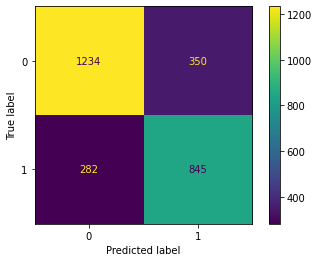

In [59]:
 plot_confusion_matrix(classifier,X_test_res,y_test)


**There is a significant improvement in predictions for the minority class as observed with the help of distinct colours.**

In [75]:
# checking coefficient values for identifying import features
coefficients = pd.DataFrame(classifier.coef_,columns=[data.columns])
coefficients.transpose()

,0
tenure,-2.983942
MonthlyCharges,0.003190
TotalCharges,1.337361
gender_Male,-0.060112
SeniorCitizen_1,0.098501
Partner_Yes,-0.026376
Dependents_Yes,-0.107593
PhoneService_Yes,-0.250718
MultipleLines_No phone service,0.249714
MultipleLines_Yes,0.188499


In [60]:
report=classification_report(y_test,prediction_res)

In [61]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1584
           1       0.71      0.75      0.73      1127

    accuracy                           0.77      2711
   macro avg       0.76      0.76      0.76      2711
weighted avg       0.77      0.77      0.77      2711



In [62]:
accuracy_score(y_test,prediction_res)

0.766875691626706